<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Community-Prediction-Competition-(kaggle)" data-toc-modified-id="Community-Prediction-Competition-(kaggle)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Community Prediction Competition (kaggle)</a></span><ul class="toc-item"><li><span><a href="#Data-desription" data-toc-modified-id="Data-desription-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data desription</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Model selection</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Gradient Boosting</a></span></li></ul></li><li><span><a href="#Prediction-test-data" data-toc-modified-id="Prediction-test-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Prediction test data</a></span></li><li><span><a href="#Export-model-for-application" data-toc-modified-id="Export-model-for-application-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Export model for application</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></div>

# Heart diseases prediction
## Community Prediction Competition (kaggle)

**The purpose of this project** is heart disease risk prediction from patient lifestyle information. \
**The evaluation metric** for this competition is *ROC AUC score*.

In [1]:
# !pip install numpy==1.24.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from pickle import dump

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

D:\Programs\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# modules versions
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Scikit-learn:', sklearn.__version__)

Pandas: 1.4.2
Numpy: 1.24.1
Scikit-learn: 1.2.1


In [3]:
# data
train_data = pd.read_csv('train.csv')
display(train_data.head())

test_data = pd.read_csv('test.csv')
display(test_data.head())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


### Data desription
The **features** includes 12 columns with the characteristics of the patient (`age`, `gender`, `height`, `weight`, `smoke`, `alco`, `active`) and his results of medical analyzes (`ap_hi`, `ap_lo`, `cholesterol`, `gluc`). Column called `cardio` is the **target** and presents only in *train_data*.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


For machine learning, the `id` column is useless. 

In [6]:
train_data.drop(columns=['id'], inplace=True)
test_data.drop(columns=['id'], inplace=True)

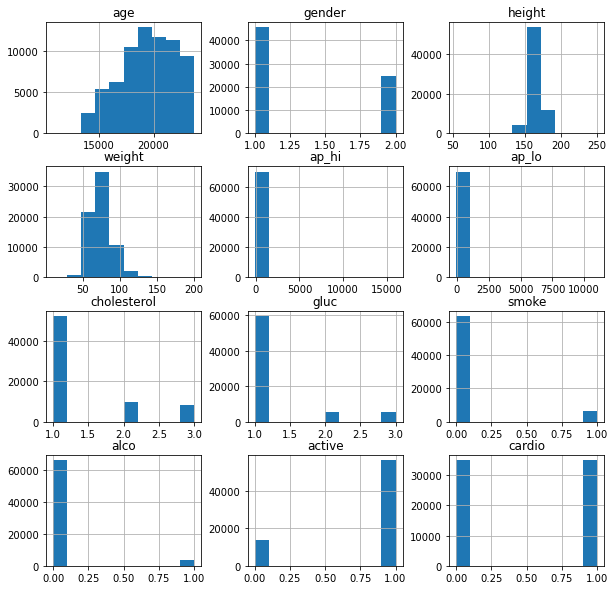

In [7]:
# column distributions
train_data.hist(figsize=(10, 10))
plt.show()

Because of all features is integer values, they need to be standartized to be able to use different algorithms. In addition:
- In the `age` column, we need to check the correctness of the data entry (abnormally large values). 
- Values from the `gender`column should be changed to 0-1 (binary feature).
- Rare and anomalously high values should be investigated in `height`, `weight`, `ap_hi`, `ap_lo` columns.

Class imbalance is not observed in the target (`cardio`). 

### Preprocessing

In [8]:
# 'age'
train_data['age'].min() # 29 years

10798

The age is most likely to be given in days.

In [9]:
train_data['age'] = (train_data['age'] / 365).astype(int)
test_data['age'] = (test_data['age'] / 365).astype(int)

train_data['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int32

In [10]:
# 'gender'
train_data['gender'] = train_data['gender'].replace(1, 0).replace(2, 1)
test_data['gender'] = test_data['gender'].replace(1, 0).replace(2, 1)

train_data['gender']

0        1
1        0
2        0
3        1
4        0
        ..
69995    1
69996    0
69997    1
69998    0
69999    0
Name: gender, Length: 70000, dtype: int64

In [11]:
# convert height to meters
train_data['height'] = train_data['height'] / 100
test_data['height'] = test_data['height'] / 100

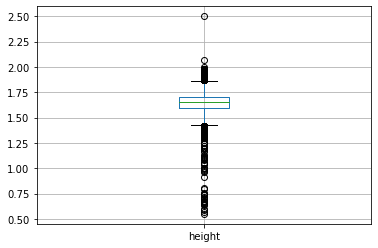

In [12]:
# 'height'
train_data.boxplot('height')
plt.show()

According to wikipedia, abnormally short height for an adult is 147 cm. Remove values above 200 and below 150 from the train dataset.

In [13]:
'{:.0%}'.format(train_data.loc[(train_data['height'] > 2)|(train_data['height'] < 1.5)].shape[0] / train_data.shape[0])

'2%'

In [14]:
train_data = train_data.loc[(train_data['height'] <= 2)&(train_data['height'] >= 1.5)]

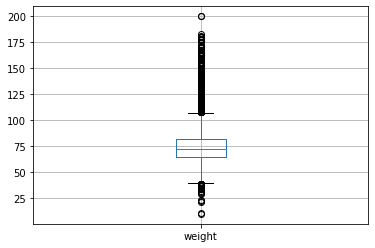

In [15]:
# 'weight'
train_data.boxplot('weight')
plt.show()

In [16]:
'{:.0%}'.format(train_data.loc[(train_data['weight'] < 20)|(train_data['weight'] > 120)].shape[0] / train_data.shape[0])

'1%'

Remove values above 120 and below 20 from the train dataset.

In [17]:
train_data = train_data.loc[(train_data['weight'] >= 20)&(train_data['weight'] <= 120)]
train_data['weight'] = train_data['weight'].astype(int)

The body mass index would be more indicative then weight and height separately. The formula of BMI is (kg/m^2).

In [18]:
# add BMI
train_data['BMI'] = round(train_data['weight'] / train_data['height']**2, 2)
test_data['BMI'] = round(test_data['weight'] / test_data['height']**2, 2)

In [19]:
# drop old features
train_data.drop(columns=['height', 'weight'], inplace=True)
test_data.drop(columns=['height', 'weight'], inplace=True)

`ap_hi` and `ap_lo` are respectively Systolic blood pressure and Diastolic blood pressure. The first is always more than the second and no one is 0.

In [20]:
# drop 0 values
train_data = train_data.loc[(train_data['ap_hi'] != 0) & (train_data['ap_lo'] != 0)]

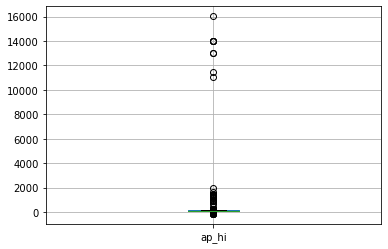

In [21]:
# 'ap_hi'
train_data.boxplot('ap_hi')
plt.show()

`ap_hi` contains values of systolic blood pressure, which should be between 24 and 240.

In [22]:
# correct ap_hi values 
def correct_aphi_values(value):
    if value < 0:
        return abs(value)
    elif value < 3:
        return value*100
    elif value <= 24:
        return value*10
    elif value > 10000:
        return value / 100
    elif value > 300:
        return value / 10
    
    return value

In [23]:
train_data['ap_hi'] = train_data['ap_hi'].apply(correct_aphi_values)
test_data['ap_hi'] = test_data['ap_hi'].apply(correct_aphi_values)

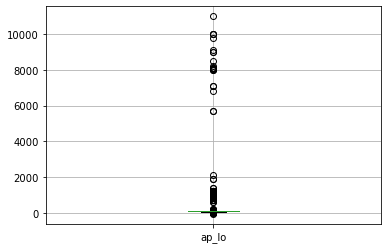

In [24]:
# 'ap_lo'
train_data.boxplot('ap_lo')
plt.show()

`ap_lo` is Diastolic blood pressure. Available range from 15 to 150. 

In [25]:
# correct ap_lo values 
def correct_aplo_values(value):
    if value < 0:
        return abs(value)
    elif value < 3:
        return value*100
    elif value <= 15:
        return value*10
    elif value > 4000:
        return value / 100
    elif value > 150:
        return value / 10
    
    return value

In [26]:
train_data['ap_lo'] = train_data['ap_lo'].apply(correct_aplo_values)
test_data['ap_lo'] = test_data['ap_lo'].apply(correct_aplo_values)

In [27]:
# rate of wrong data
train_data[train_data['ap_hi'] < train_data['ap_lo']].shape[0] / train_data.shape[0]

0.0014273311849791787

In [28]:
def replace_values(row):
    high = row['ap_hi']
    low = row['ap_lo']
    
    if high < low:
        row['ap_hi'] = low
        row['ap_lo'] = high
    
    return row

In [29]:
# replace ap_ho and ap_lo in the cases
train_data = train_data.apply(replace_values, axis=1)
test_data = test_data.apply(replace_values, axis=1)

Also difference between ap_hi and ap_lo may be useful.

In [30]:
train_data['ap_diff'] = train_data['ap_hi'] - train_data['ap_lo']
train_data.drop(columns=['ap_lo'], inplace=True) 

test_data['ap_diff'] = test_data['ap_hi'] - test_data['ap_lo']
test_data.drop(columns=['ap_lo'], inplace=True) 

Target and features:

In [31]:
# train_data
features_train = train_data.drop(columns=['cardio'])
target_train = train_data['cardio']

# test_data
features_test = test_data

Standardization of numeric (not binary) data:

In [32]:
numeric = ['age', 'BMI', 'ap_hi', 'ap_diff', 'cholesterol', 'gluc']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()

,age,gender,ap_hi,cholesterol,gluc,smoke,alco,active,BMI,ap_diff
0,-0.414084,1.0,-1.000224,-0.535426,-0.393401,0.0,0.0,1.0,-1.085855,-1.301017
1,0.325023,0.0,0.773962,2.417347,-0.393401,0.0,0.0,1.0,1.565462,0.384542
2,-0.266263,0.0,0.182567,2.417347,-0.393401,0.0,0.0,0.0,-0.770807,1.227321
3,-0.709727,1.0,1.365358,-0.535426,-0.393401,0.0,0.0,1.0,0.292994,0.384542
4,-0.857548,0.0,-1.591620,-0.535426,-0.393401,0.0,0.0,0.0,-0.873095,-0.458238


In [33]:
binary = ['gender', 'smoke', 'alco', 'active']
features_train[binary] = features_train[binary].astype(int)
features_test[binary] = features_test[binary].astype(int)

### Model selection
For each selected ML algorithm (*Random Forest*, *Gradient Boosting*), let's find the optimal parameters. Cross validation will be used to obtain more accurate averaged results.

#### Random Forest

In [34]:
%%time

params = { 
    'n_estimators': [i for i in range(100, 600, 100)],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [i for i in range(4, 9)],
    'criterion' :['entropy'],
    'random_state' : [123]
}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='roc_auc', cv= 5)
grid.fit(features_train, target_train)

CPU times: total: 31min 49s
Wall time: 35min


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'random_state': [123]},
             scoring='roc_auc')

In [35]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 123}

In [36]:
grid.best_score_

0.8013370654864064

In [37]:
features_test

,age,gender,ap_hi,cholesterol,gluc,smoke,alco,active,BMI,ap_diff
0,-0.266263,0,0.182567,-0.535426,-0.393401,0,0,1,1.751627,0.384542
1,-0.118442,1,0.182567,-0.535426,-0.393401,0,0,1,-0.695113,-0.458238
2,0.325023,0,-0.408829,-0.535426,-0.393401,0,0,0,0.012723,-0.036848
3,-0.561906,1,0.182567,-0.535426,-0.393401,0,0,1,0.039318,-0.458238
4,-1.301013,1,-0.408829,-0.535426,-0.393401,0,0,1,-0.200037,-0.458238
...,...,...,...,...,...,...,...,...,...,...
29995,0.916308,1,1.365358,-0.535426,-0.393401,0,1,0,1.710712,1.227321
29996,-0.414084,0,-1.000224,-0.535426,-0.393401,0,0,1,-0.185716,-0.458238
29997,0.768487,1,-0.408829,-0.535426,-0.393401,0,0,0,-1.210647,-0.458238
29998,-2.040120,1,-0.408829,0.940961,-0.393401,0,0,0,-0.236861,-0.458238


#### Gradient Boosting

Find the optimal number of `n_estimators` at `learning_rate` = 0.1:

In [38]:
%%time

params = {'n_estimators': range(20, 101, 10)}

model = GradientBoostingClassifier(
    learning_rate = 0.1, 
    min_samples_split=500, 
    min_samples_leaf=50,
    max_depth=8,
    max_features='sqrt',
    subsample=0.8, 
    random_state=123)

grid = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    scoring='roc_auc', 
    n_jobs=4, cv=5)

grid.fit(features_train, target_train)

display(pd.DataFrame(grid.cv_results_))
print(f'The best result: {round(grid.best_score_, 5)} при {grid.best_params_}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.558706,0.143137,0.043793,0.003598,20,{'n_estimators': 20},0.797131,0.807588,0.805141,0.803545,0.795385,0.801758,0.004704,9
1,3.641289,0.153403,0.053251,0.007882,30,{'n_estimators': 30},0.797475,0.808278,0.805240,0.804158,0.796575,0.802345,0.004558,6
2,4.627963,0.260242,0.058451,0.010000,40,{'n_estimators': 40},0.797558,0.808721,0.805374,0.804334,0.796409,0.802479,0.004730,4
3,5.432964,0.156812,0.069663,0.013159,50,{'n_estimators': 50},0.797588,0.808868,0.805339,0.804599,0.796417,0.802562,0.004778,2
4,6.574442,0.394420,0.074415,0.015514,60,{'n_estimators': 60},0.797720,0.809071,0.805225,0.804622,0.796243,0.802576,0.004839,1
5,7.123322,0.292271,0.084497,0.015596,70,{'n_estimators': 70},0.797651,0.809221,0.804849,0.804585,0.796280,0.802517,0.004842,3
6,7.719213,0.430493,0.088766,0.016799,80,{'n_estimators': 80},0.797638,0.809045,0.804669,0.804735,0.796057,0.802429,0.004851,5
7,9.516027,1.666887,0.104768,0.018858,90,{'n_estimators': 90},0.797387,0.808997,0.804478,0.804713,0.795782,0.802271,0.004940,7
8,16.192759,2.031986,0.312290,0.259355,100,{'n_estimators': 100},0.797300,0.808899,0.804387,0.804648,0.795626,0.802172,0.004957,8


The best result: 0.80258 при {'n_estimators': 60}
CPU times: total: 4 s
Wall time: 1min 47s


Set up optimal tree parameters:

In [39]:
%%time

params = {
    'max_depth': range(5, 16, 2),
    'min_samples_split': range(200, 1001, 200)}

model = GradientBoostingClassifier(
    learning_rate=0.1, 
    n_estimators=60,
    max_features='sqrt',
    subsample=0.8, 
    random_state=123)

grid = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    scoring='roc_auc', 
    n_jobs=4, cv=5)

grid.fit(features_train, target_train)

display(pd.DataFrame(grid.cv_results_))
print(f'The best result: {round(grid.best_score_, 5)} при {grid.best_params_}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.574265,0.138188,0.061247,0.003260,5,200,"{'max_depth': 5, 'min_samples_split': 200}",0.796895,0.808271,0.805131,0.804334,0.797219,0.802370,0.004535,12
1,4.449750,0.094220,0.053568,0.004081,5,400,"{'max_depth': 5, 'min_samples_split': 400}",0.796802,0.808510,0.805223,0.803576,0.796760,0.802174,0.004681,17
2,4.361102,0.159736,0.062287,0.004921,5,600,"{'max_depth': 5, 'min_samples_split': 600}",0.797139,0.808438,0.805598,0.803840,0.797180,0.802439,0.004553,9
3,4.379484,0.061255,0.063666,0.003703,5,800,"{'max_depth': 5, 'min_samples_split': 800}",0.797540,0.808280,0.805105,0.803875,0.797166,0.802393,0.004361,11
4,4.321710,0.167204,0.060375,0.003752,5,1000,"{'max_depth': 5, 'min_samples_split': 1000}",0.796704,0.808309,0.805632,0.804186,0.796964,0.802359,0.004702,13
5,5.365962,0.195692,0.061821,0.015660,7,200,"{'max_depth': 7, 'min_samples_split': 200}",0.797746,0.808416,0.805448,0.804414,0.796668,0.802538,0.004560,7
6,5.225294,0.130787,0.063322,0.009880,7,400,"{'max_depth': 7, 'min_samples_split': 400}",0.798397,0.808391,0.805636,0.804785,0.797082,0.802858,0.004366,1
7,5.060309,0.228890,0.062954,0.007637,7,600,"{'max_depth': 7, 'min_samples_split': 600}",0.798283,0.807986,0.805290,0.803964,0.797828,0.802670,0.003987,5
8,5.160413,0.195608,0.058384,0.009010,7,800,"{'max_depth': 7, 'min_samples_split': 800}",0.798318,0.808345,0.805512,0.804411,0.797481,0.802814,0.004221,2
9,5.119317,0.147428,0.052936,0.008585,7,1000,"{'max_depth': 7, 'min_samples_split': 1000}",0.798267,0.808507,0.805388,0.804278,0.796867,0.802661,0.004407,6


The best result: 0.80286 при {'max_depth': 7, 'min_samples_split': 400}
CPU times: total: 6.88 s
Wall time: 5min 24s


In [40]:
%%time

params = {
    'min_samples_split': range(400, 1200, 200),
    'min_samples_leaf': range(30, 71, 10)}

model = GradientBoostingClassifier(
    learning_rate=0.1, 
    n_estimators=60,
    max_features='sqrt',
    max_depth=7,
    subsample=0.8, 
    random_state=123)

grid = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    scoring='roc_auc', 
    n_jobs=4, cv=5)

grid.fit(features_train, target_train)

display(pd.DataFrame(grid.cv_results_))
print(f'The best result: {round(grid.best_score_, 5)} при {grid.best_params_}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.106005,2.664066,0.080851,0.016793,30,400,"{'min_samples_leaf': 30, 'min_samples_split': ...",0.798265,0.808498,0.805347,0.804102,0.796683,0.802579,0.004436,16
1,12.287965,2.383966,0.065069,0.007747,30,600,"{'min_samples_leaf': 30, 'min_samples_split': ...",0.798252,0.808242,0.806088,0.804153,0.797402,0.802827,0.004291,4
2,7.140307,1.977915,0.067949,0.009512,30,800,"{'min_samples_leaf': 30, 'min_samples_split': ...",0.797310,0.808360,0.805449,0.804436,0.797154,0.802542,0.004523,19
3,5.467087,0.165080,0.068418,0.004066,30,1000,"{'min_samples_leaf': 30, 'min_samples_split': ...",0.798265,0.808867,0.805909,0.804146,0.796891,0.802816,0.004556,5
4,5.591386,0.185841,0.073673,0.003298,40,400,"{'min_samples_leaf': 40, 'min_samples_split': ...",0.798585,0.807792,0.805138,0.804758,0.797206,0.802696,0.004080,11
5,5.633682,0.162596,0.069657,0.006110,40,600,"{'min_samples_leaf': 40, 'min_samples_split': ...",0.798080,0.808300,0.805814,0.804658,0.797150,0.802800,0.004404,7
6,5.409305,0.049945,0.069730,0.006604,40,800,"{'min_samples_leaf': 40, 'min_samples_split': ...",0.798263,0.808762,0.805706,0.804794,0.797216,0.802948,0.004463,2
7,5.364615,0.080965,0.067718,0.008905,40,1000,"{'min_samples_leaf': 40, 'min_samples_split': ...",0.798061,0.808674,0.805348,0.803928,0.797003,0.802603,0.004430,15
8,6.035135,0.273184,0.067995,0.004056,50,400,"{'min_samples_leaf': 50, 'min_samples_split': ...",0.798333,0.808143,0.805487,0.804282,0.796834,0.802616,0.004320,14
9,5.436000,0.057259,0.068136,0.009179,50,600,"{'min_samples_leaf': 50, 'min_samples_split': ...",0.798097,0.808704,0.805840,0.803934,0.796856,0.802686,0.004534,12


The best result: 0.80296 при {'min_samples_leaf': 60, 'min_samples_split': 800}
CPU times: total: 3.89 s
Wall time: 2min 55s


In [41]:
%%time

params = {'subsample': np.arange(0.6, 0.9, 0.05)}

model = GradientBoostingClassifier(
    learning_rate=0.1, 
    n_estimators=60,
    max_features='sqrt',
    max_depth=7,
    min_samples_leaf=60,
    min_samples_split=800,
    random_state=123)

grid = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    scoring='roc_auc', 
    n_jobs=4, cv=5)

grid.fit(features_train, target_train)

display(pd.DataFrame(grid.cv_results_))
print(f'The best result: {round(grid.best_score_, 5)} при {grid.best_params_}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.031178,0.153530,0.087625,0.009751,0.6,{'subsample': 0.6},0.797802,0.808852,0.805587,0.804060,0.796743,0.802609,0.004636,5
1,5.165820,0.115441,0.073806,0.002124,0.65,{'subsample': 0.65},0.798027,0.808064,0.805772,0.804232,0.796465,0.802512,0.004496,7
2,5.118392,0.115891,0.070088,0.006946,0.7,{'subsample': 0.7000000000000001},0.797717,0.808632,0.805737,0.804289,0.796707,0.802616,0.004640,4
3,7.421968,1.392588,0.245402,0.153121,0.75,{'subsample': 0.7500000000000001},0.798130,0.808630,0.805626,0.804433,0.796465,0.802657,0.004615,3
4,9.769411,0.673403,0.068573,0.011730,0.8,{'subsample': 0.8000000000000002},0.798286,0.808962,0.805611,0.804735,0.797186,0.802956,0.004503,1
5,10.853957,1.902825,0.151273,0.120332,0.85,{'subsample': 0.8500000000000002},0.797969,0.808036,0.805349,0.804293,0.797120,0.802554,0.004277,6
6,10.621925,2.130591,0.052077,0.012551,0.9,{'subsample': 0.9000000000000002},0.798341,0.808620,0.805377,0.804942,0.797333,0.802923,0.004354,2


The best result: 0.80296 при {'subsample': 0.8000000000000002}
CPU times: total: 5.78 s
Wall time: 1min 18s


The optimal parameters for `learning_rate` = 0.1:
- `n_estimators` = 60
- `max_depth` = 7
- `min_samples_leaf` = 60
- `min_samples_split` = 800
- `subsample` = 0.8

Let's reduce `learning_rate` and increase `n_estimators` by 2/10/20 times:

In [42]:
%%time

model = GradientBoostingClassifier(
    learning_rate=0.05, 
    n_estimators=120,
    max_depth=7,
    min_samples_split=800,
    min_samples_leaf=60,
    subsample=0.8,
    max_features='sqrt',
    random_state=123)

round(mean(cross_val_score(model, features_train, target_train, scoring='roc_auc', n_jobs=4, cv=5)), 5)

CPU times: total: 62.5 ms
Wall time: 17.7 s


0.80291

In [43]:
%%time

model = GradientBoostingClassifier(
    learning_rate=0.01, 
    n_estimators=600,
    max_depth=7,
    min_samples_split=800,
    min_samples_leaf=60,
    subsample=0.8,
    max_features='sqrt',
    random_state=123)

round(mean(cross_val_score(model, features_train, target_train, scoring='roc_auc', n_jobs=4, cv=5)), 5)

CPU times: total: 15.6 ms
Wall time: 1min 50s


0.80307

In [44]:
%%time

model = GradientBoostingClassifier(
    learning_rate=0.005, 
    n_estimators=1200,
    max_depth=7,
    min_samples_split=800,
    min_samples_leaf=60,
    subsample=0.8,
    max_features='sqrt',
    random_state=123)

round(mean(cross_val_score(model, features_train, target_train, scoring='roc_auc', n_jobs=4, cv=5)), 5)

CPU times: total: 15.6 ms
Wall time: 3min 1s


0.80313

The given results are better, so taken values: `learning_rate` = 0.005 and `n_estimators`= 1200.

### Prediction test data

In [45]:
test_data_new = pd.read_csv('test.csv')
test_id = test_data_new['id']
test_id

0            5
1            6
2            7
3           10
4           11
         ...  
29995    99984
29996    99987
29997    99989
29998    99994
29999    99997
Name: id, Length: 30000, dtype: int64

In [46]:
model = GradientBoostingClassifier(
    learning_rate=0.005, 
    n_estimators=1200,
    max_depth=7,
    min_samples_split=800,
    min_samples_leaf=60,
    subsample=0.8, 
    max_features='sqrt',
    random_state=123)

model.fit(features_train, target_train)
predictions = model.predict_proba(features_test)[:,1]

prediction_df = pd.DataFrame(test_id, columns=['id'])
prediction_df['cardio'] = predictions

prediction_df

,id,cardio
0,5,0.495151
1,6,0.535619
2,7,0.399886
3,10,0.556730
4,11,0.213154
...,...,...
29995,99984,0.873133
29996,99987,0.169106
29997,99989,0.469645
29998,99994,0.308016


In [47]:
# load results to file for kaggle
prediction_df.to_csv('predicted_data_6.csv', index=False)

### Export model for application

In [ ]:
# train_data
features_train = train_data.drop(columns=['cardio'])
target_train = train_data['cardio']

# test_data
features_test = test_data

# scaler
numeric = ['age', 'BMI', 'ap_hi', 'ap_diff', 'cholesterol', 'gluc']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

# pipeline training
pipe = Pipeline([
    ('scaler', scaler),
    ('gbm', model)
])

pipe.fit(features_train, target_train)

In [ ]:
# export model to file
with open('gbm_model.pcl', 'wb') as fid:
    dump(pipe, fid)

In [ ]:
# format input data
features_train.sample()

### Results
The most effective way to solve the problem is building a *Gradient Boosting Model* with sequential selection of parameters and cross-validation. Before training model, the following **preprocessing** was carried out:
- column `id` was dropped, 
- `age` converted to years, `height` converted to meters,
- `height` and `weight` were replaced by calculated `BMI`,
- values of `ap_hi` and `ap_lo` were corrected and changed where needed,
- `ap_lo` was replaced by calculated difference between `ap_hi` and `ap_lo`,
- all numeric features were stardardized.

The best found **parameters** for *Gradient Boosting Model*:
- `learning_rate` = 0.05,
- `n_estimators` = 1200,
- `max_depth` = 7,
- `min_samples_split` = 800,
- `min_samples_leaf` = 60,
- `subsample` = 0.8,
- `max_features` = 'sqrt'.

The best AUC-ROC score on the **train** set: **0.80313** \
The best AUC-ROC score on the **test** set (info from [kaggle](https://www.kaggle.com/competitions/yap15-heart-diseases-predictions/leaderboard)): **0.80415** 